# Text Processing Pipeline with Python

The majority of world's data is unstructured data, in the form of text or voice or image. In this notebook, we create a text processing pipeline, using Python's natural language processing tools such as `requests`, `BeautifulSoup`, `NLTK` (Natural Language ToolKit). 

Our goal is to analyze and visualize word frequency distribution in a text available online in HTML format. T illustrate the following steps, we use a classic text from the [Gutenberg Project](https://www.gutenberg.org) website (which contains a large corpus of books) to create the pipeline. 

More precisely, we want to write a function that does all of the following steps for us: 
 
1. Using `requests` package, we get the HTML text of `Pride and Prejudice by Jane Austen` from `Gutenberg Project` website. 
2. Using `BeautifulSoup` package, then we extract words from this web data.  
3. Using `NLTK`, we `tokenize` the text: 
   - remove everything that is not a word (whitespace, punctuation, etc.)
   - split the text into a list of lowercase words
   - remove stop words (such as "a", "an", "and", "or", "the", "of", etc.) that appear a lot but do not add useful information

  
4. Using `NLTK`, and `matplotlib`, we analyze and visualize the distribution of words in the text.  

As an input, we pass the url of the book and the function returns the plot of the most frequent words with their frequencies. 

## Setup

Let us import the required Python packages that we need in our text processing.

In [1]:
# import requests, BeautifulSoup, and nltk
import requests
from bs4 import BeautifulSoup
import nltk

# import plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Requesting the HTML Text 

To begin with our text analysis, we need to send a request to the `Gutenberg Project` website and get the freely available text file of the book `Pride and Prejudice` at:

- http://www.gutenberg.org/files/1342/1342-h/1342-h.htm

In [2]:
# make a request to get 'Pride and Prejudice' 
url = 'http://www.gutenberg.org/files/1342/1342-h/1342-h.htm'
r = requests.get(url)

# set the correct text encoding of the above HTML page
r.encoding = 'utf-8'

# extract the HTML text from the request object
html_text = r.text

# printing the first 1000 characters in html
print(html_text[0:1000])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<meta http-equiv="Content-Style-Type" content="text/css" />
<title>The Project Gutenberg eBook of Pride and Prejudice, by Jane Austen</title>
<link rel="coverpage" href="images/cover.jpg" />
<style type="text/css">

body { margin-left: 20%;
       margin-right: 20%;
       text-align: justify }

h1, h2 {text-align: center; font-style: normal; font-weight:
normal; line-height: 1.5; margin-top: .5em; margin-bottom: .5em;}

h1 {font-size: 300%;
    margin-top: 0.6em;
    margin-bottom: 0.6em;
    letter-spacing: 0.12em;
    word-spacing: 0.2em;
    text-indent: 0em;}
h2 {font-size: 150%; margin-top: 2em; margin-bottom: 1em;}

.no-break {page-break-before: avoid;} /* for epubs */

div.chapter {page-break-before: a


## 2. Extracting the Main Text from HTML Text 

The above HTML does _contain_ what we want which is the content of `Pride and Prejudice`. However, is not quite what we want. As we can see there are extra html text in the above text which we do not need it. So, we need to extract the text of `Pride and Prejudice` from this HTML. This is where we need to use the `BeautifulSoup` package, which makes the above HTML file syntactically "beautiful".

In [3]:
# creating a BeautifulSoup object from the HTML
# Remark: for reproducibility we should also add a parser argument.
# Read about "difference between parsers" at the following address:
# https://www.crummy.com/software/BeautifulSoup/bs4/doc/#differences-between-parsers
soup = BeautifulSoup(html_text)
#type(soup)
#print(soup.prettify())

# get the text out of the soup
text = soup.get_text()

# print out text between characters 1000 and 3000
print(text[2000:2500])


t is a truth universally acknowledged, that a single man in possession of
      a good fortune, must be in want of a wife.
    

      However little known the feelings or views of such a man may be on his
      first entering a neighbourhood, this truth is so well fixed in the minds
      of the surrounding families, that he is considered the rightful property
      of some one or other of their daughters.
    

      “My dear Mr. Bennet,” said his lady to him one day, “have you heard t


## 3. Tokenizing the Text

We now have the whole text of `Pride and Prejudice`. However, we still need to do a bit of extra work on the text to prepare it for our final analysis. We do the following:

- tokenize the text: remove everything that is not a word (whitespace, punctuation, etc.)
- split the text into a list of lowercase words
- removing stop words ("a", "as", "and", "of", "for", etc.)

#### Tokenization

In [4]:
# create a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# tokenize the text
tokens = tokenizer.tokenize(text)

# print out the first 10 words/tokens 
print(tokens[0:10])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Pride', 'and', 'Prejudice', 'by', 'Jane']


#### Splitting the text to a list of lower case words

In [5]:
# create a list "words", containing all tokens lowercased
words = [word.lower() for word in tokens]

# print out the first 10 words/tokens 
print(words[0:10])

['the', 'project', 'gutenberg', 'ebook', 'of', 'pride', 'and', 'prejudice', 'by', 'jane']


#### Removing stop words

The `NLTK` package includes a good list of stop words in English that we use here. In the first line of code, we first make sure that `stopwords` are loaded.

In [6]:
# download the English stopwords
#nltk.download('stopwords')

# get the English stop words from NLTK
sw = nltk.corpus.stopwords.words('english')

# print out the first 10 stop words
print('The first 10 stopwords: ', sw[0:10])

# create a list "ns_words" of "words" that are not in sw
ns_words = []

for word in words:
    if word not in sw:
        ns_words.append(word)

# print the first 10 elements of ns_words 
print('The first 10 non-stop words in the text: ', ns_words[0:5])

The first 10 stopwords:  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
The first 10 non-stop words in the text:  ['project', 'gutenberg', 'ebook', 'pride', 'prejudice']


## 4. The Distribution of Words

Now we can find the word frequencies in the text. In particular, we want to know:

- What are the most frequent words and how often do they appear?


In [7]:
# create freq dist and plot top 25 most
# frequently occured words in the book
freq_dist = nltk.FreqDist(ns_words)
freq_dist.most_common(25)

[('mr', 786),
 ('elizabeth', 635),
 ('could', 527),
 ('would', 471),
 ('darcy', 418),
 ('said', 401),
 ('mrs', 343),
 ('much', 329),
 ('bennet', 323),
 ('must', 318),
 ('bingley', 306),
 ('jane', 295),
 ('miss', 283),
 ('one', 275),
 ('know', 239),
 ('though', 226),
 ('well', 224),
 ('never', 220),
 ('sister', 218),
 ('soon', 216),
 ('think', 211),
 ('may', 209),
 ('time', 203),
 ('good', 201),
 ('might', 200)]

#### Visualizing the word frequencies

Finally, let us visualize word frequencies using `NLTK` and `matplotlib`. We first need to create a frequency distribution object using the `nltk.FreqDist()` function. 

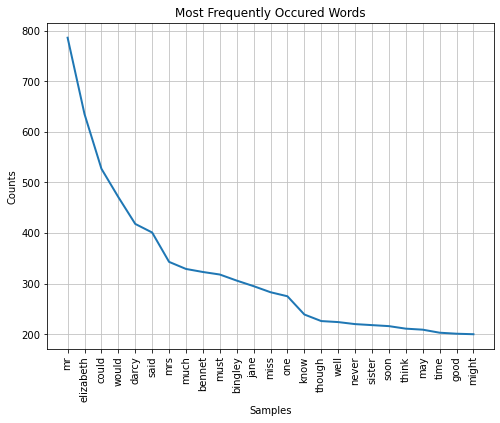

In [8]:
# plot the distribution of top 25 most
# frequently occured words in the book
plt.figure(figsize=(8,6))
freq_dist.plot(25, title = 'Most Frequently Occured Words')
plt.show()

## Writing the Pipeline Function

Now, we can combine all the above steps to write a function that implements the pipeline of word frequencies by taking the url of the book/text and returning the frequency plot of the book.

In [9]:
def text_freq_plot(url):
    """
    function takes the 'url' address of a HTML book/text, and
    return the distribution plot of most frequently occured words 
    """
    # make a request and get the url
    r = requests.get(url)
    # extract HTML text from response object above 
    html_text = r.text
    # create a BeautifulSoup object from the HTML text
    soup = BeautifulSoup(html_text)
    # get the text out of the soup object
    text = soup.get_text()
    # create tokenizer
    tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
    # create tokens
    tokens = tokenizer.tokenize(text)
    # initialize the final list of words in the text
    words = []
    # loop through tokens and make them lower case
    for word in tokens:
        words.append(word.lower())
    # get English stopwords
    sw = nltk.corpus.stopwords.words('english')
    # initialize the list "ns_words" of "words" that are not in sw
    ns_words = []
    # append to ns_words all words that are in words but not in sw
    for word in words:
        if word not in sw:
            ns_words.append(word)
    # create freq dist and plot
    freq_dist = nltk.FreqDist(ns_words)
    plt.figure(figsize=(8,6))
    freq_dist.plot(25, title = 'Distribution of Most Frequent Words')
    plt.show()
    print('Most frequently occured words:')
    return freq_dist.most_common(25)


Let us try the above function with another book from `Gutenberg Project` website: 

- `The Analysis of Mind by Bertrand Russell` with the url 'https://www.gutenberg.org/files/2529/2529-h/2529-h.htm'

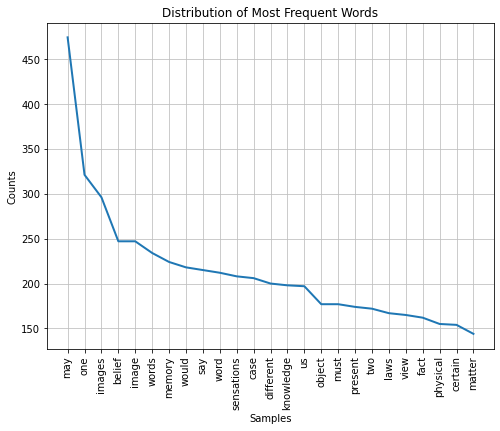

Most frequently occured words:


[('may', 474),
 ('one', 321),
 ('images', 296),
 ('belief', 247),
 ('image', 247),
 ('words', 234),
 ('memory', 224),
 ('would', 218),
 ('say', 215),
 ('word', 212),
 ('sensations', 208),
 ('case', 206),
 ('different', 200),
 ('knowledge', 198),
 ('us', 197),
 ('object', 177),
 ('must', 177),
 ('present', 174),
 ('two', 172),
 ('laws', 167),
 ('view', 165),
 ('fact', 162),
 ('physical', 155),
 ('certain', 154),
 ('matter', 144)]

In [10]:
url = 'https://www.gutenberg.org/files/2529/2529-h/2529-h.htm'
text_freq_plot(url)